In [1]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
L 1 2; right=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right=0.5
P1 2_2 0_2; down
W 2 2_2;right=0.5""")


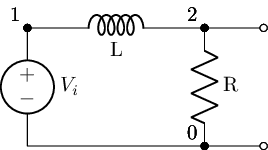

In [2]:
cct.draw()

In [3]:
H = (cct.R.V(s) / cct.Vi.V(s)).simplify()

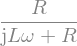

In [4]:
H(j * omega)

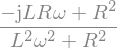

In [5]:
H(j * omega).rationalize_denominator()

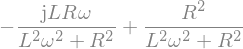

In [6]:
H(j * omega).real_imag

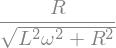

In [7]:
H(j * omega).magnitude


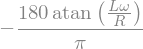

In [8]:
H(j * omega).phase_degrees

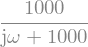

In [9]:
H1 = H.subs('L',1).subs('R',1e3)
H1(j * omega)

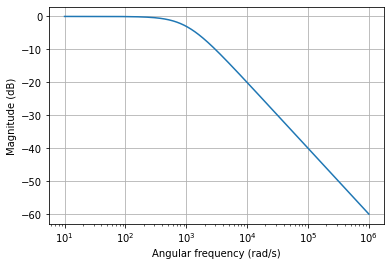

In [10]:
from numpy import logspace
w = logspace(1, 6, 500)
%matplotlib inline
ax = H1(j * omega).dB.plot(w, log_frequency=True)

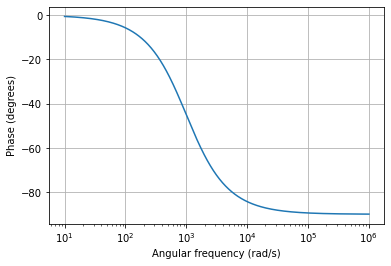

In [11]:
ax = H1(j * omega).phase_degrees.plot(w, log_frequency=True)